In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'Holiday Expenditure Type' : ['GO Conference Tickets', 
                                      'Flights', 
                                      'Flights', 
                                      'Flights',
                                      'Flight Meals',
                                      'Flight Meals',
                                      'Flight Meals',
                                      'Accomodation', 
                                      'Accomodation', 
                                      'Massage (2h)', 
                                      'Activities Spending',
                                      'Food', 
                                      'Souvenirs', 
                                      'Transport', 
                                      'Others',
                                      ],
    'Details and Date' : ['18-20 Mar', 
                          'SG to MNL - 15 Mar : 1050 - 1445, Agoda', 
                          'MNL to Cebu - 21 Mar : 0835 - 1000 (forgot 0.38 cashback), Agoda', 
                          'Cebu to SG - 23 Mar : 2045- 0030, Free Lounge, Trip.com', 
                          'Cebu Pacific - Not ordered, 24-48h before',
                          'Philippine Airlines - Ordered PHP 380',
                          'Cebu Pacific - Not ordered, 24-48h before',
                          'Kingsford Manila - Free Shuttle, Check in 3pm, check out 12pm', 
                          'Cebu Resort (est)', 
                          'Kingsford Manila', 
                          '-', 
                          '-', 
                          '-', 
                          '-',
                          '-',
                          ],                                       
    'SGD' :          [136.64, 
                      123.33,
                      37.36,
                      77.5,
                      10,
                      10,
                      10,
                      150,
                      150,
                      55,
                      0,
                      0,
                      0,
                      0,
                      0],

    'Booking ID' : ['-',
                    '1949851646',
                    '1949873084',
                    '1578943487659941',
                    '271-4363509',
                    '-',
                    '-',
                    '-',
                    '-',
                    '-',
                    '-',
                    '-',
                    '-',
                    '-',
                    '-']})

total_row = pd.DataFrame({
    'Holiday Expenditure Type' : ['Total'],
    'Details and Date' : ['Krisflyer ID'],
    'SGD' : [df['SGD'].sum()],
    'Booking ID' : ['8155248396']
    })

df = pd.concat([total_row, df], ignore_index=True, axis = 0)                       

In [2]:
df

,Holiday Expenditure Type,Details and Date,SGD,Booking ID
0,Total,Krisflyer ID,759.83,8155248396
1,GO Conference Tickets,18-20 Mar,136.64,-
2,Flights,"SG to MNL - 15 Mar : 1050 - 1445, Agoda",123.33,1949851646
3,Flights,MNL to Cebu - 21 Mar : 0835 - 1000 (forgot 0.3...,37.36,1949873084
4,Flights,"Cebu to SG - 23 Mar : 2045- 0030, Free Lounge,...",77.50,1578943487659941
5,Flight Meals,"Cebu Pacific - Not ordered, 24-48h before",10.00,271-4363509
6,Flight Meals,Philippine Airlines - Ordered PHP 380,10.00,-
7,Flight Meals,"Cebu Pacific - Not ordered, 24-48h before",10.00,-
8,Accomodation,"Kingsford Manila - Free Shuttle, Check in 3pm,...",150.00,-
9,Accomodation,Cebu Resort (est),150.00,-


In [3]:
df.SGD.sum()

np.float64(1519.6599999999999)

<Axes: xlabel='Holiday Expenditure Type'>

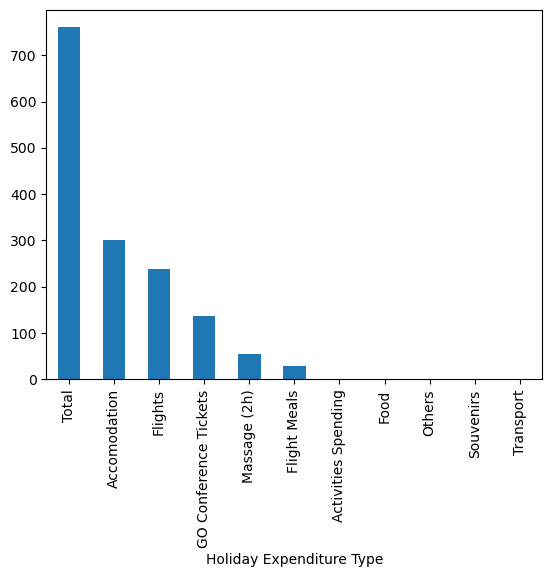

In [4]:
# df.groupby('Holiday Expenditure Type')['SGD'].sum().plot(kind='bar')
group = df.groupby('Holiday Expenditure Type', as_index=False)['SGD'].sum().sort_values(by='SGD', ascending=False)
group.plot(kind='bar', x='Holiday Expenditure Type', y='SGD', legend=False)


In [5]:
group

,Holiday Expenditure Type,SGD
9,Total,759.83
0,Accomodation,300.00
3,Flights,238.19
5,GO Conference Tickets,136.64
6,Massage (2h),55.00
2,Flight Meals,30.00
1,Activities Spending,0.00
4,Food,0.00
7,Others,0.00
8,Souvenirs,0.00


/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_68184/3425810587.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Holiday Expenditure Type', y='SGD', data=group, palette = colors, errorbar=None)
/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_68184/3425810587.py:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x='Holiday Expenditure Type', y='SGD', data=group, palette = colors, errorbar=None)


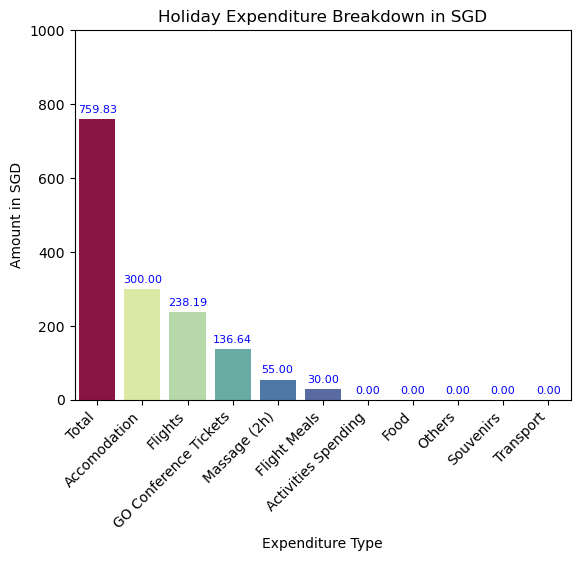

In [6]:
import seaborn as sns
import matplotlib.colors as mcolors

# setting color map intensity based on my graph's value
norm = mcolors.Normalize(vmin=group['SGD'].min(), vmax=group['SGD'].max())
cmap = plt.get_cmap("Spectral_r") # spectral_r is reversed spectral, red for high values, blue for low values
colors = cmap(norm(group['SGD'].values))

ax = sns.barplot(x='Holiday Expenditure Type', y='SGD', data=group, palette = colors, errorbar=None)
ax.set_title('Holiday Expenditure Breakdown in SGD')
ax.set_xlabel('Expenditure Type')
plt.xticks(rotation=45, ha = 'right')
ax.set_ylabel('Amount in SGD')
ax.set_ylim(0, 1000)


for container in ax.containers: #ax.containers gives all the bar patches, ax.bar_label() adds value labels to each bar
    ax.bar_label(container, fmt = '%.2f', label_type='edge', padding=3, color = 'blue', fontsize=8, fontweight=True)

In [7]:
# !pip install  -U kaleido


In [8]:
# save to csv
df.to_csv('Travel_Viz_Cost_Breakdown.csv', index=False)


In [9]:
# pip install --upgrade plotly


/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_68184/524895125.py:16: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




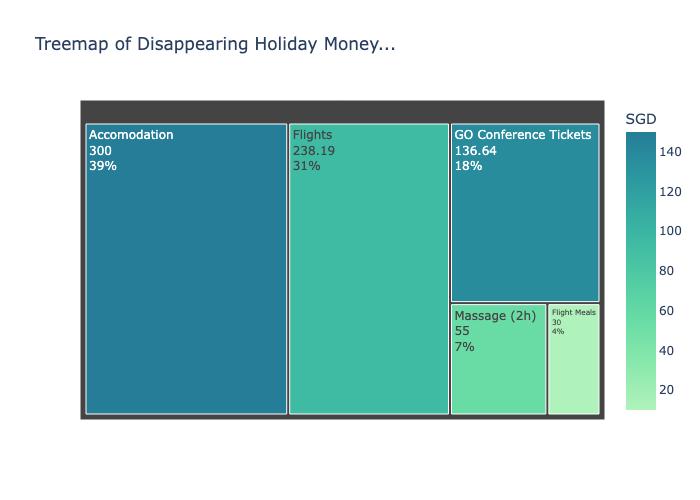

In [10]:
import plotly.express as px
import plotly.graph_objects as go

df_nonzero = df[(df['Holiday Expenditure Type'] != 'Total') & (df['SGD'] > 0)]
fig_treemap = px.treemap(
    df_nonzero,
    path=['Holiday Expenditure Type'],
    values='SGD',
    title='Treemap of Disappearing Holiday Money...',
    color='SGD',
    color_continuous_scale='Tealgrn'
)

fig_treemap.update_traces(textinfo="label+value+percent parent")
fig_treemap.show()
fig_treemap.write_image("figtreemap.png", engine="kaleido")

from IPython.display import Image
Image("figtreemap.png")

/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_68184/2691903478.py:12: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




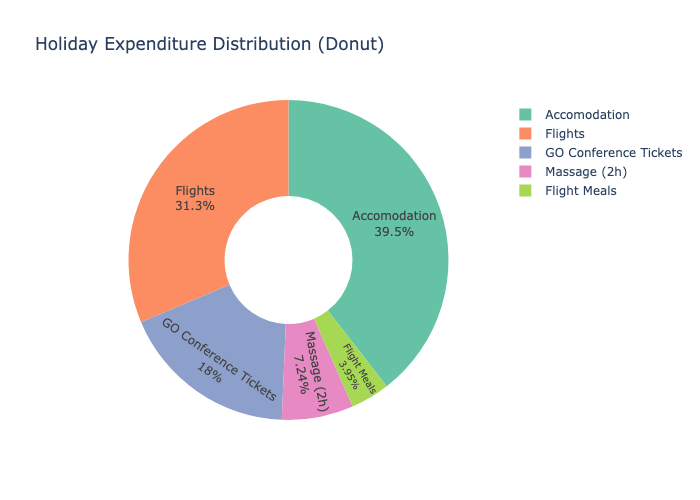

In [15]:
fig_donut = px.pie(
    df_nonzero,
    names='Holiday Expenditure Type',
    values='SGD',
    title='Holiday Expenditure Distribution (Donut)',
    hole=0.4,
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig_donut.update_traces(textposition='inside', textinfo='percent+label')
fig_donut.show()

fig_donut.write_image("figdonut.png", engine="kaleido")

from IPython.display import Image
Image("figdonut.png")

/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_68184/3593019593.py:12: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




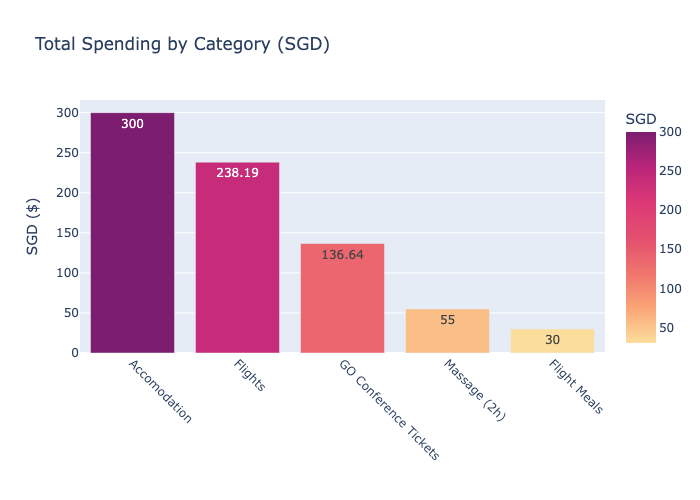

In [16]:
fig_bar = px.bar(
    df_nonzero.groupby('Holiday Expenditure Type', as_index=False)['SGD'].sum().sort_values(by='SGD', ascending=False),
    x='Holiday Expenditure Type',
    y='SGD',
    title='Total Spending by Category (SGD)',
    text_auto=True,
    color='SGD',
    color_continuous_scale='Sunsetdark')
fig_bar.update_layout(xaxis_title='', yaxis_title='SGD ($)', xaxis_tickangle=45)
fig_bar.show()

fig_bar.write_image("figbar.png", engine="kaleido")

from IPython.display import Image
Image("figbar.png")

/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_68184/587626270.py:11: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




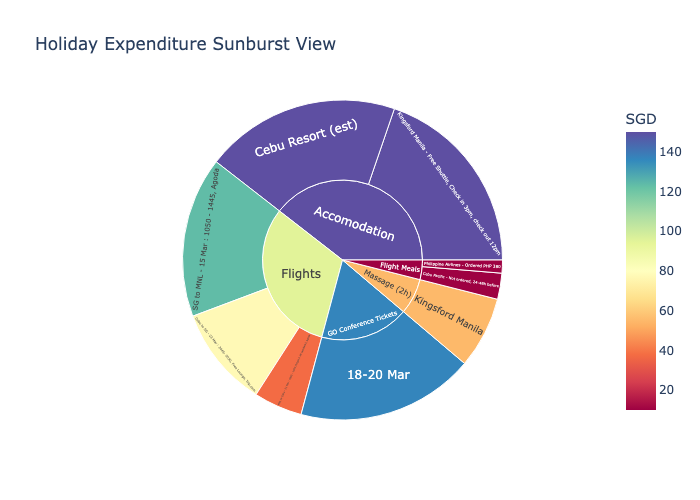

In [17]:
fig_sunburst = px.sunburst(
    df_nonzero,
    path=['Holiday Expenditure Type', 'Details and Date'],
    values='SGD',
    title='Holiday Expenditure Sunburst View',
    color='SGD',
    color_continuous_scale='Spectral'
)
fig_sunburst.show()

fig_sunburst.write_image("figsunburst.png", engine="kaleido")

from IPython.display import Image
Image("figsunburst.png")

/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_68184/1844599464.py:5: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_68184/1844599464.py:27: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




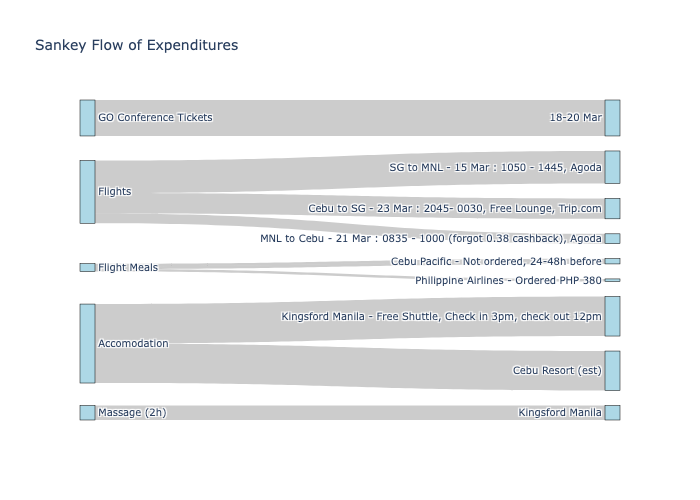

In [18]:
sources = df_nonzero['Holiday Expenditure Type']
targets = df_nonzero['Details and Date']

# Map labels to indices
all_nodes = list(pd.unique(sources.tolist() + targets.tolist()))
source_indices = [all_nodes.index(s) for s in sources]
target_indices = [all_nodes.index(t) for t in targets]
values = df_nonzero['SGD']

fig_sankey = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color="lightblue"
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
)])
fig_sankey.update_layout(title_text="Sankey Flow of Expenditures", font_size=10)
fig_sankey.show()

fig_sankey.write_image("figsankey.png", engine="kaleido")

from IPython.display import Image
Image("figsankey.png")